# Chapter 13 Tools for Parameter Estimation: PDF, CDF, Quantile



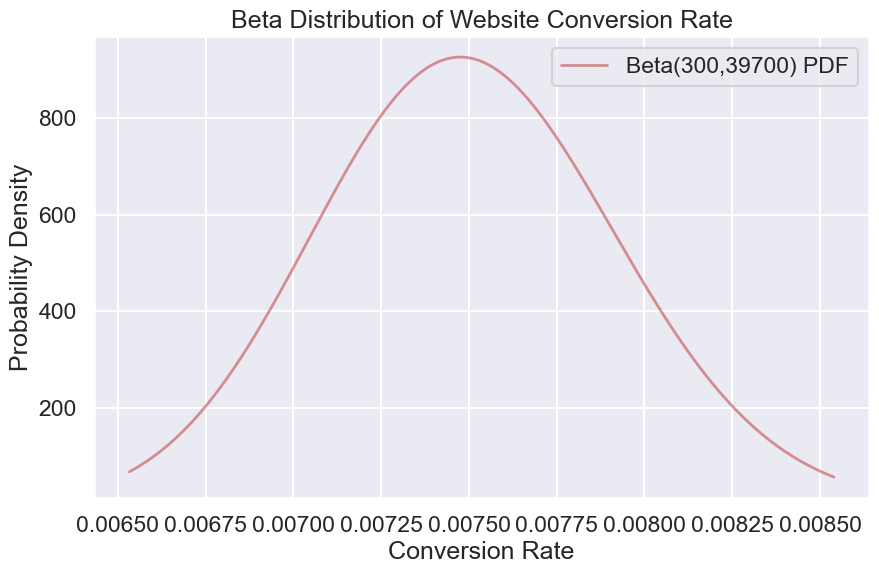

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the beta distribution
a, b = 300, 39700

# Define the range of x values
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 1000)

# Calculate the beta PDF values
y = beta.pdf(x, a, b)


# Plotting

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', lw=2, alpha=0.6, label=f'Beta({a},{b}) PDF')
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Beta Distribution of Website Conversion Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()


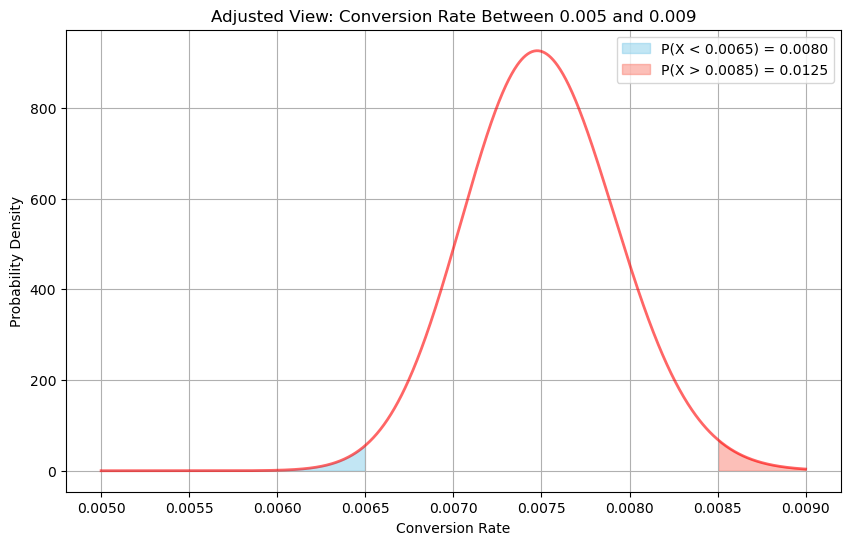

In [7]:
# Adjusting the range of x values to be between 0.005 and 0.009
x_adjusted = np.linspace(0.005, 0.009, 1000)
y_adjusted = beta.pdf(x_adjusted, a, b)

# Recalculating the shaded areas with the adjusted range
plt.figure(figsize=(10, 6))

# Fill the areas under the curve based on the new criteria
plt.fill_between(x_adjusted, y_adjusted, where=(x_adjusted < 0.0065), color='skyblue', alpha=0.5, label=f'P(X < 0.0065) = {prob_less_than_0065:.4f}')
plt.fill_between(x_adjusted, y_adjusted, where=(x_adjusted > 0.0085), color='salmon', alpha=0.5, label=f'P(X > 0.0085) = {prob_greater_than_0085:.4f}')

# Plot the beta distribution with the adjusted x-axis range
plt.plot(x_adjusted, y_adjusted, 'r-', lw=2, alpha=0.6)
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Adjusted View: Conversion Rate Between 0.005 and 0.009')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


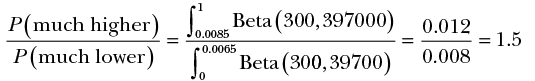

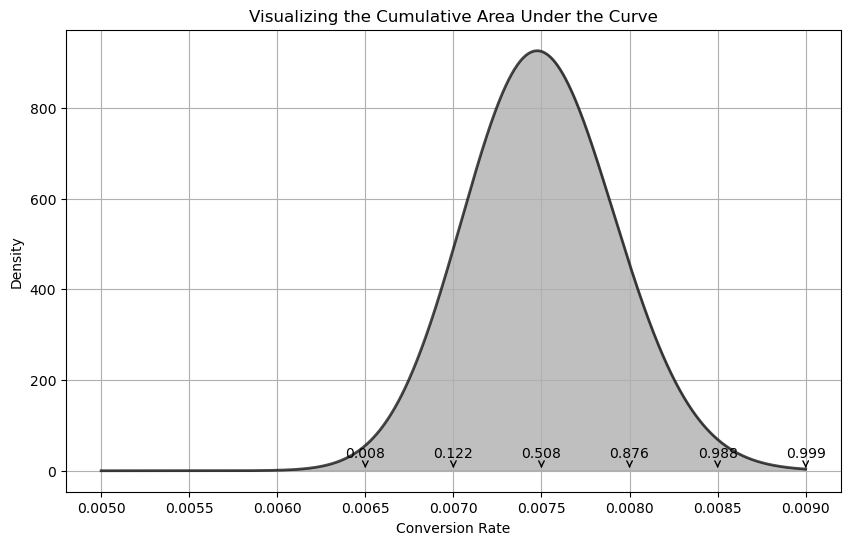

In [8]:
# Recalculating the beta distribution for the new x-axis range
x_cumulative = np.linspace(0.006, 0.009, 7)  # Increment by 0.0005 from 0.006 to 0.009
y_cumulative = beta.pdf(x_cumulative, a, b)

# Calculate the cumulative distribution values for the increments
cumulative_probs = beta.cdf(x_cumulative, a, b)

# Plot the beta distribution and cumulative areas
plt.figure(figsize=(10, 6))
plt.plot(x_adjusted, y_adjusted, 'k-', lw=2, alpha=0.7)

# Fill the area under the curve
plt.fill_between(x_adjusted, y_adjusted, color='grey', alpha=0.5)

# Mark the cumulative probability values on the plot
for i, (x_val, y_val, prob) in enumerate(zip(x_cumulative, y_cumulative, cumulative_probs)):
    if i == 0:  # Skip the first point to only show increments
        continue
    plt.annotate(f'{prob:.3f}', xy=(x_val, 0), xytext=(x_val, 30),
                 textcoords='data', ha='center', color='black',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

# Additional settings for the plot to match the given image style
plt.title('Visualizing the Cumulative Area Under the Curve')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()


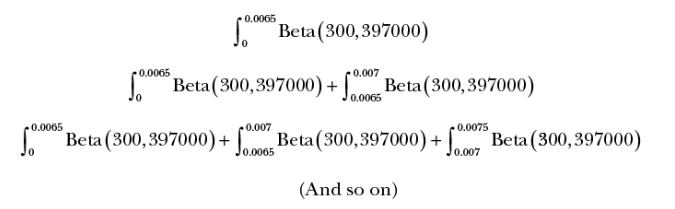

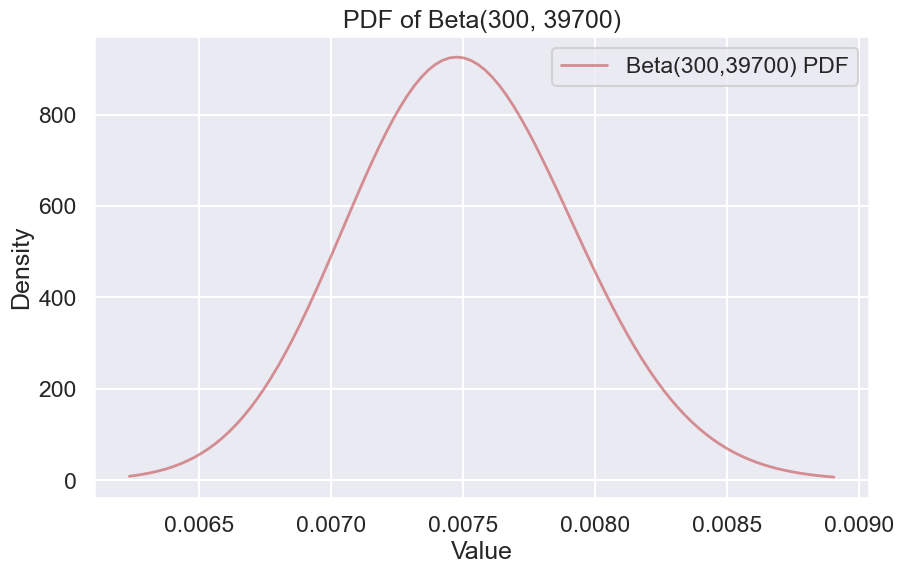

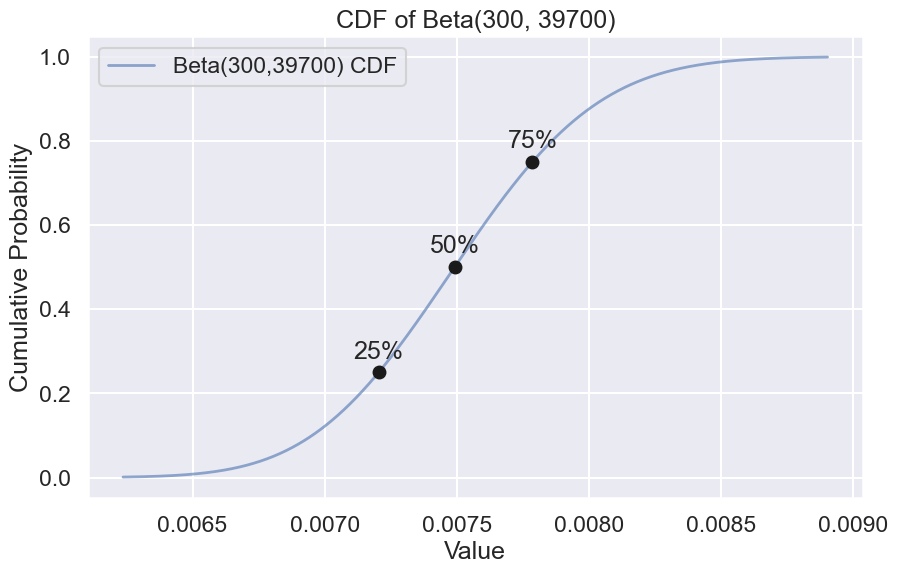

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distribution
a, b = 300, 39700

# Generate x values for PDF
x_pdf = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
# PDF values for the x values
y_pdf = beta.pdf(x_pdf, a, b)

# Plotting the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_pdf, y_pdf, 'r-', lw=2, alpha=0.6, label=f'Beta({a},{b}) PDF')
plt.title('PDF of Beta(300, 39700)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# For the CDF, use a more detailed range of x values to capture the behavior of the CDF
x_cdf = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 1000)
# CDF values for the detailed x values
y_cdf = beta.cdf(x_cdf, a, b)

# Plotting the CDF on a separate plot
plt.figure(figsize=(10, 6))
plt.plot(x_cdf, y_cdf, 'b-', lw=2, alpha=0.6, label=f'Beta({a},{b}) CDF')

# Annotate specific points, marking the 25th, 50th, and 75th percentiles
percentiles = [25, 50, 75]
for p in percentiles:
    value = beta.ppf(p / 100.0, a, b)
    plt.plot(value, p / 100.0, 'ko')  # Mark the point
    plt.annotate(f'{p}%', (value, p / 100.0), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('CDF of Beta(300, 39700)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend(loc='best')
plt.grid(True)
plt.show()





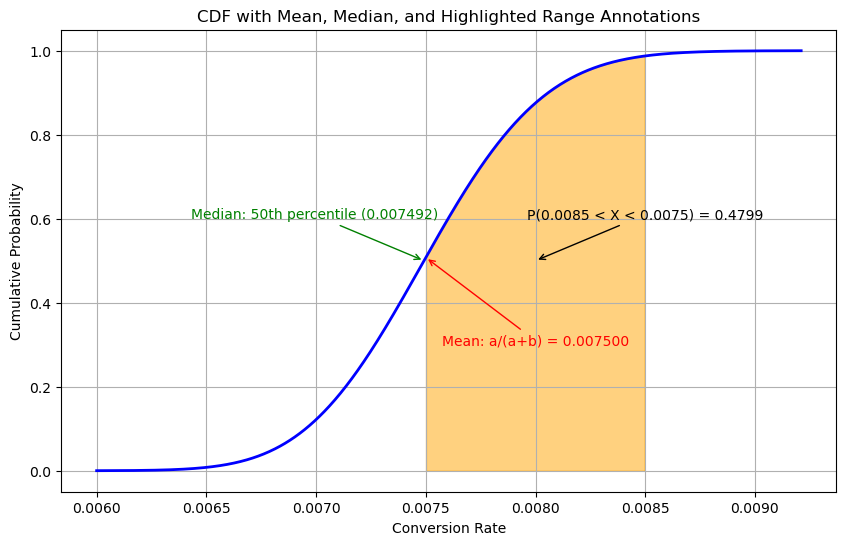

In [26]:
# Define the parameters for the beta distribution
a, b = 300, 39700

# Define the range for the x-axis to include mean and median annotations
x_full_range = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 1000)
y_cdf_full_range = beta.cdf(x_full_range, a, b)

# Calculate the mean and median again
mean = beta.mean(a, b)
median = beta.ppf(0.5, a, b)

# Calculate the probability of the conversion rate being between 0.008 and 0.009
prob_between_0075_and_0085 = beta.cdf(0.0085, a, b) - beta.cdf(0.0075, a, b)

# Plot the CDF with highlighted range between 0.008 and 0.009
plt.figure(figsize=(10, 6))
plt.plot(x_full_range, y_cdf_full_range, 'b-', lw=2)

# Highlight the range between 0.008 and 0.009
plt.fill_between(x_full_range, y_cdf_full_range, where=(x_full_range >= 0.0075) & (x_full_range <= 0.0085), color='orange', alpha=0.5)

# Annotate the median on the plot
plt.annotate(f'Median: 50th percentile ({median:.6f})', xy=(median, 0.5), xytext=(median-0.0005, 0.6),
             textcoords='data', ha='center', color='green',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green'))

# Annotate the mean on the plot
plt.annotate(f'Mean: a/(a+b) = {mean:.6f}', xy=(mean, beta.cdf(mean, a, b)), xytext=(mean+0.0005, 0.3),
             textcoords='data', ha='center', color='red',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))

plt.annotate(f'P(0.0085 < X < 0.0075) = {prob_between_0075_and_0085:.4f}', xy=(0.008, 0.5), xytext=(0.0085, 0.6),
             textcoords='data', ha='center', color='black',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'))

# Additional settings for the plot
plt.title('CDF with Mean, Median, and Highlighted Range Annotations')
plt.xlabel('Conversion Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()









The Median and the Mean in the previous CDF are very close implying that the beta is evenly distributed and not impacted by extreme values.

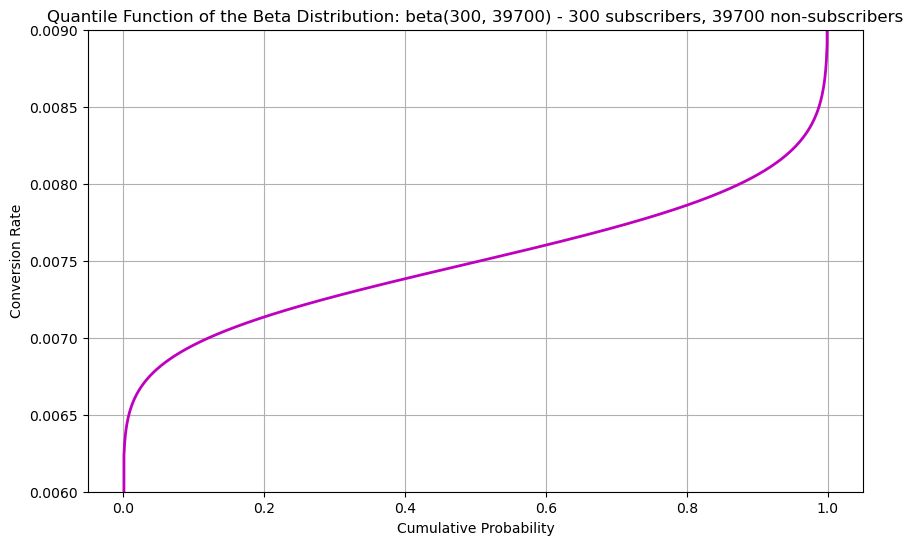

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range for the cumulative probabilities from 0 to 1
cumulative_probs_range = np.linspace(0, 1, 1000)

# Calculate the quantiles for the cumulative probabilities range
quantiles = beta.ppf(cumulative_probs_range, 300, 39700)

# Plot the quantile function (inverse of the CDF)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_probs_range, quantiles, 'm-', lw=2)

# Set the limits for the y-axis
plt.ylim(0.0060, 0.0090)

# Additional settings for the plot
plt.title('Quantile Function of the Beta Distribution: beta(300, 39700) - 300 subscribers, 39700 non-subscribers')
plt.xlabel('Cumulative Probability')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()




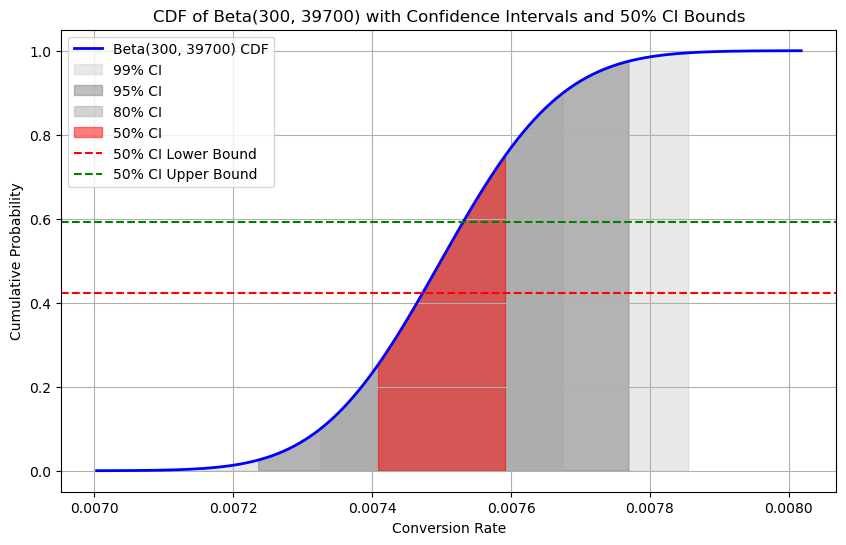

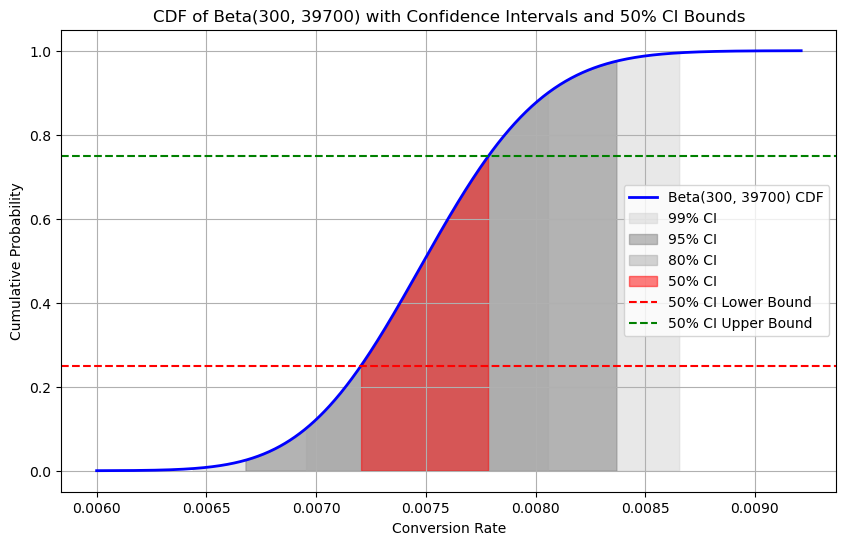

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


def plot_beta_info(a,b):

    # Calculate the confidence interval limits
    ci_99 = beta.ppf([0.005, 0.995], a, b)
    ci_95 = beta.ppf([0.025, 0.975], a, b)
    ci_80 = beta.ppf([0.1, 0.9], a, b)
    ci_50 = beta.ppf([0.25, 0.75], a, b)  # 50% CI

    # Define the x range for plotting
    x_range = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 1000)
    y_cdf = beta.cdf(x_range, a, b)

    # Plotting the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_cdf, 'b-', lw=2, label='Beta(300, 39700) CDF')

    # Highlight the confidence intervals
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_99[0]) & (x_range <= ci_99[1]), color='lightgrey', alpha=0.5, label='99% CI')
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_95[0]) & (x_range <= ci_95[1]), color='grey', alpha=0.5, label='95% CI')
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_80[0]) & (x_range <= ci_80[1]), color='darkgrey', alpha=0.5, label='80% CI')
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_50[0]) & (x_range <= ci_50[1]), color='red', alpha=0.5, label='50% CI')

    # Draw horizontal lines for the 50% CI bounds
    plt.axhline(beta.cdf(ci_50[0], 300, 39700), color='red', linestyle='--', label='50% CI Lower Bound')
    plt.axhline(beta.cdf(ci_50[1], 300, 39700), color='green', linestyle='--', label='50% CI Upper Bound')

    # Additional settings
    plt.title('CDF of Beta(300, 39700) with Confidence Intervals and 50% CI Bounds')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_beta_info(3000, 397000)
plot_beta_info(300, 39700)



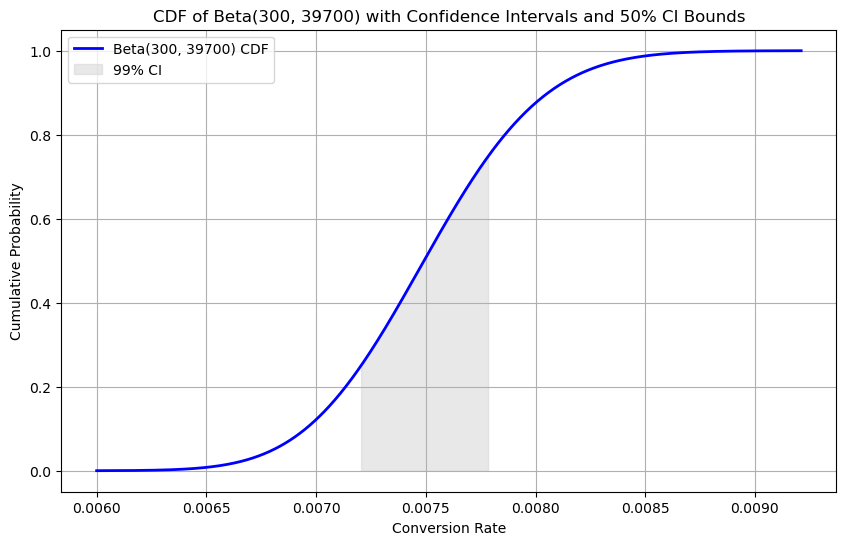

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_beta_info(alpha, beta_val):

    # Calculate the confidence interval limits
    ci_99 = beta.ppf([0.005, 0.995], alpha, beta_val)
    ci_95 = beta.ppf([0.025, 0.975], alpha, beta_val)
    ci_80 = beta.ppf([0.1, 0.9], alpha, beta_val)
    ci_50 = beta.ppf([0.25, 0.75], alpha, beta_val)  # 50% CI

    # Define the x range for plotting
    x_range = np.linspace(beta.ppf(0.0001, alpha, beta_val), beta.ppf(0.9999, alpha, beta_val), 1000)
    y_cdf = beta.cdf(x_range, alpha, beta_val)

    # Plotting the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_cdf, 'b-', lw=2, label='Beta(300, 39700) CDF')

    # Highlight the confidence intervals
    plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_50[0]) & (x_range <= ci_50[1]), color='lightgrey', alpha=0.5, label='99% CI')
    # plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_95[0]) & (x_range <= ci_95[1]), color='grey', alpha=0.5, label='95% CI')
    # plt.fill_between(x_range, 0, y_cdf, where=(x_range >= ci_80[0]) & (x_range <= ci_80[1]), color='darkgrey', alpha=0.5, label='80% CI')

    # # Draw horizontal lines for the 50% CI bounds
    # plt.axhline(beta.cdf(ci_50[0], 300, 39700), color='red', linestyle='--', label='50% CI Lower Bound')
    # plt.axhline(beta.cdf(ci_50[1], 300, 39700), color='green', linestyle='--', label='50% CI Upper Bound')

    # Additional settings
    plt.title('CDF of Beta(300, 39700) with Confidence Intervals and 50% CI Bounds')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_beta_info(300, 39700)

# Chapter 14 - Parameter Est. w/ Prior Probabilities



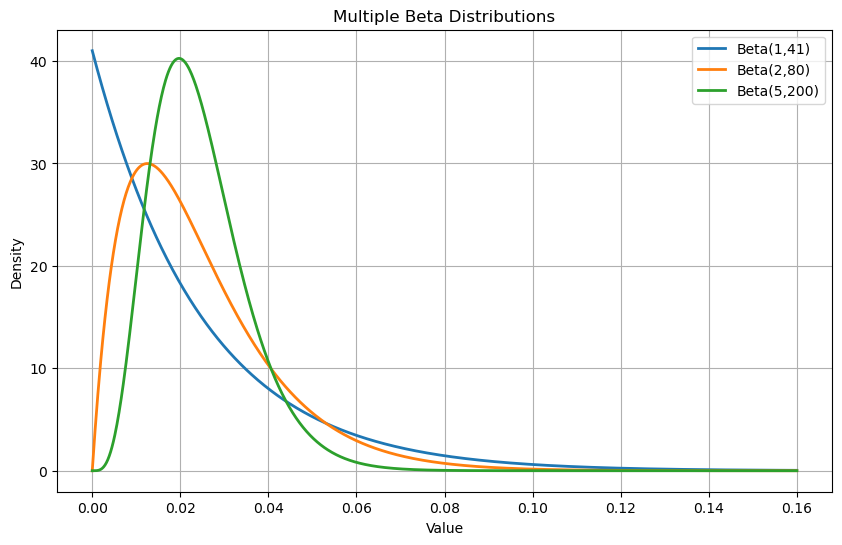

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the Beta distributions
params = [(1, 41), (2, 80), (5, 200)]

# Define the x range
x = np.linspace(0, .16, 1000)

# Plot each Beta distribution
plt.figure(figsize=(10, 6))
for a, b in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, lw=2, label=f'Beta({a},{b})')

# Additional settings
plt.title('Multiple Beta Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


The conversion rate of 2.4 percent from your email provider gives us a starting point: now we know we want a beta distribution whose mean is roughly 0.024. (The mean of a beta distribution is α / (α + β).) However, this still leaves us with a range of possible options: Beta(1,41), Beta(2,80), Beta(5,200), Beta(24,976), and so on. So which should we use? Let’s plot some of these out and see what they look like:
* The lower combined a+b the wider the distributuion
* Use of beta(1,41) is called a weak prior and will be more easily overriden by new data.
* beta(5,200) takes more data to change the trajectory of the results.

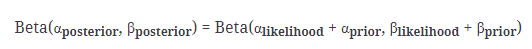



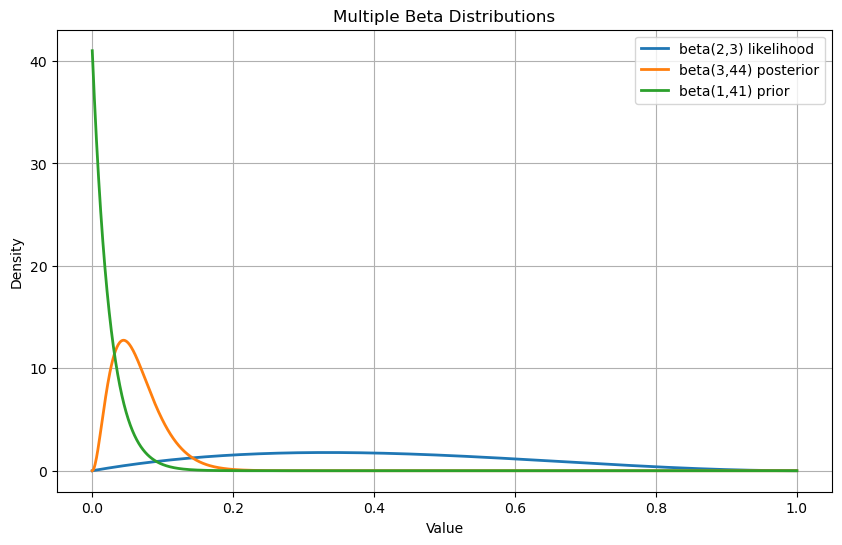

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the Beta distributions
params = [(2,3,"beta(2,3) likelihood"), (3,44, "beta(3,44) posterior"), (1, 41, "beta(1,41) prior")]


# Define the x range
x = np.linspace(0, 1, 1000)

# Plot each Beta distribution
plt.figure(figsize=(10, 6))
for a, b, label in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, lw=2, label=label)

# Additional settings
plt.title('Multiple Beta Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Compare our likelihood: beta(2,3) to our posterior(w/ likelihood): beta(3,44)
* Even weak likelihood makes huge impact on conversion rate
* Likelihood alone implies conversion rate could be as high as 80%
* It could be that the implied posterior rate is too pessimistic.
* How do we prove this ...... More Data!!!!

In this scenario we wanted to model the case where we observed that out of 5 emails, 2 people converted to subscribers.  We started with information from out internet provider that says usually only a 2.4% conversion rate.  We selected beta(1,41) - see above.

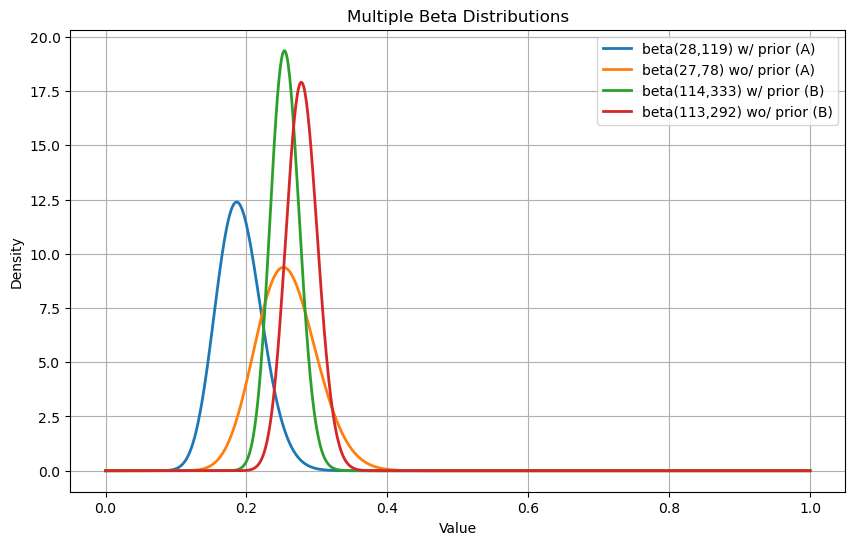

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Original data point: Beta(2, 3)
# Prior we used: Beta(1, 41)

# First Estimate with Prior: Beta(3, 44)

# Data Point A: 100 people visited, 25 subscribed: beta(25, 75)
# Beta with prior: Beta(3,44) + Beta(25,75) =  Beta(28, 119)
# Beta without prior: Beta(2,3) + Beta(25,75) = Beta(27, 78)


# Data Point B: 300 people visited, 86 subscribed: beta(86, 214)
# Beta with prior: Beta(28,119) + Beta(86,214) =  Beta(114, 333)
# Beta without prior: Beta(27,78) + Beta(86,214) = Beta(113, 292)


# Define the parameters for the Beta distributions
params = [(28,119,"beta(28,119) w/ prior (A)"), (27,78, "beta(27,78) wo/ prior (A)"), (114,333, "beta(114,333) w/ prior (B)"), (113,292, "beta(113,292) wo/ prior (B)")]

# Define the x range
x = np.linspace(0, 1, 1000)

# Plot each Beta distribution
plt.figure(figsize=(10, 6))
for a, b, label in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, lw=2, label=label)

# Additional settings
plt.title('Multiple Beta Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

The figure above shows A dataset and B dataset using a prior and not.  The A dataset is the first datapoint and the B dataset is a subsequent datapoint that refines the probability distribution.  

* Original data point: Beta(2, 3)
* Prior we used: Beta(1, 41)

* First Estimate with Prior: Beta(3, 44)

* Data Point A: 100 people visited, 25 subscribed: beta(25, 75)
* Beta with prior: Beta(3,44) + Beta(25,75) =  Beta(28, 119)
* Beta without prior: Beta(2,3) + Beta(25,75) = Beta(27, 78)


* Data Point B: 300 people visited, 86 subscribed: beta(86, 214)
* Beta with prior: Beta(28,119) + Beta(86,214) =  Beta(114, 333)
* Beta without prior: Beta(27,78) + Beta(86,214) = Beta(113, 292)

# **Chapter 15 Hypothesis Testing A/B testing**

Now for something completely different: Chapter 15 and Hypothesis testing. The setup:

* 600 blog subscribers
* Only test 300 of them because we want to test with the whole population
* Split 300 into 2 groups: A - email with picture; B - email without picture
* How many will convert to subscribe
* Assuming 30 percent prior non-informative:

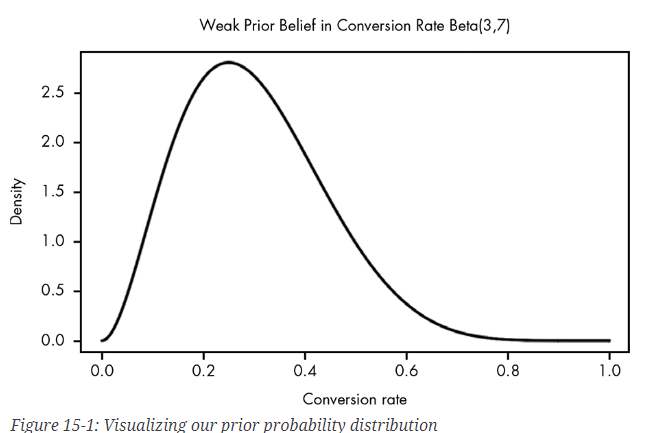

* Data Collected:
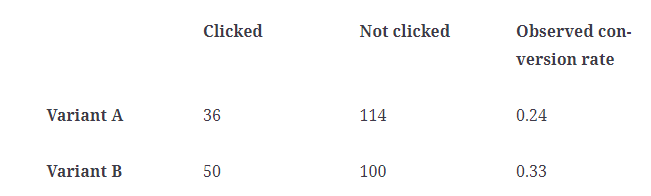


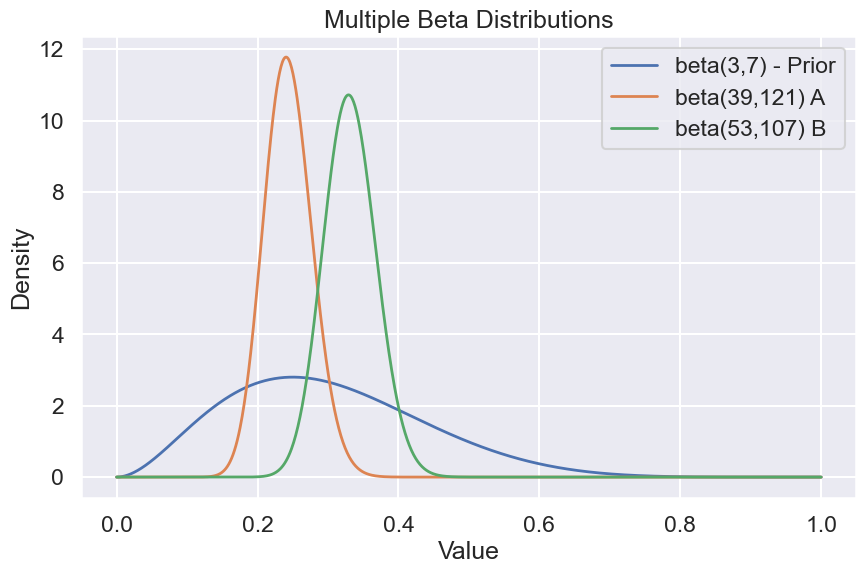

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the Beta distributions
params = [(3, 7,"beta(3,7) - Prior"), (39, 121,"beta(39,121) A"), (53, 107,"beta(53,107) B")]

# Define the x range
x = np.linspace(0, 1.0, 1000)

# Plot each Beta distribution
plt.figure(figsize=(10, 6))
for a, b, label in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, lw=2, label=label)

# Additional settings
plt.title('Multiple Beta Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


0.95971
[1.58318822 1.35074015 1.14202265 ... 1.37712647 1.37674954 1.43909295]


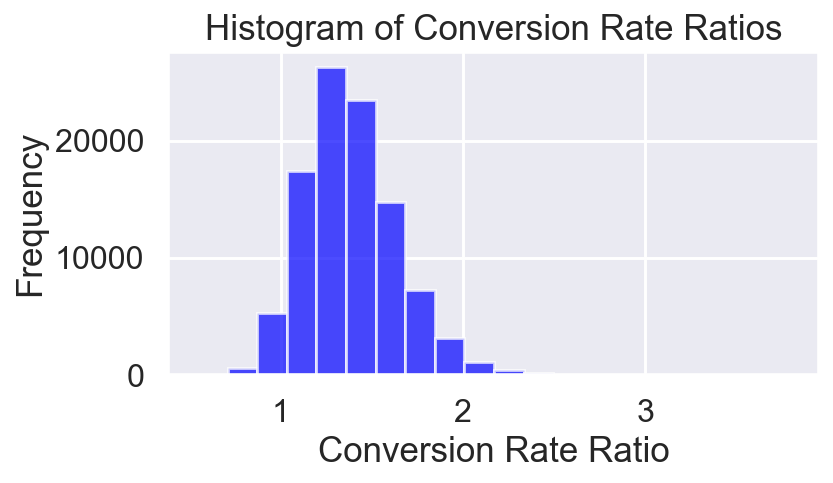

[0.54525813 0.61524766 0.64865532 ... 3.10675281 3.29702045 3.79319522]
[1.0000e-05 2.0000e-05 3.0000e-05 ... 9.9998e-01 9.9999e-01 1.0000e+00]


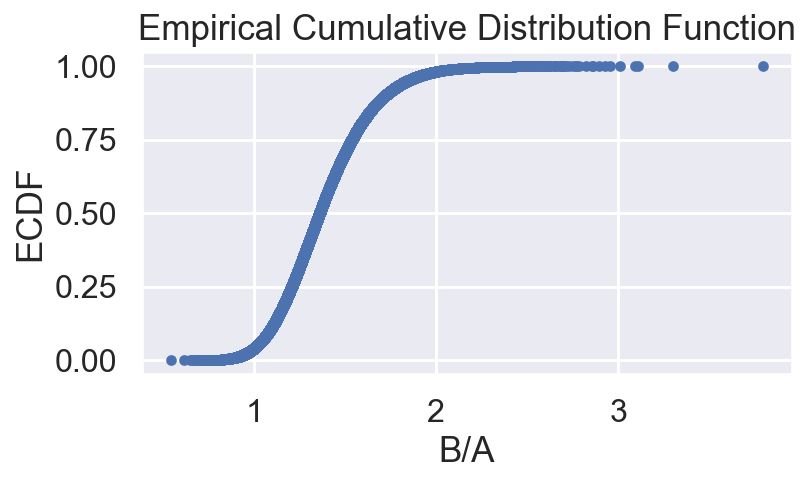

In [68]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

n_trials = 100000
A = beta.rvs(39, 121, size=n_trials)
B = beta.rvs(53, 107, size=n_trials)

print(sum(B > A)/n_trials)

ratios = B/A
print(ratios)

# plot ratios in histogram
plt.figure(figsize=(6,3), dpi=140)
plt.hist(ratios, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Conversion Rate Ratios')
plt.xlabel('Conversion Rate Ratio')
plt.ylabel('Frequency')
plt.show()

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    print(x)
    n = x.size
    y = np.arange(1, n+1) / n
    print(y)
    return(x,y)

x, y = ecdf(ratios)

# plot ECDF
plt.figure(figsize=(6,3), dpi=140)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('B/A')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function')
plt.show()


# sns.distplot(ratios, kde=False, bins=20)

Now we can see our results more clearly. There is really just a small, small chance that A is better, and even if it is better, it’s not going to be by much. We can also see that there’s about a 25 percent chance that variant B is a 50 percent or more improvement over A, and even a reasonable chance it could be more than double the conversion rate! Now, in choosing B over A, we can actually reason about our risk by saying, “The chance that B is 20 percent worse is roughly the same that it’s 100 percent better.” Sounds like a good bet to me, and a much better statement of our knowledge than, “There is a statistically significant difference between B and A.”

[ 1  2  3  4  5  6  7  8  9 10]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


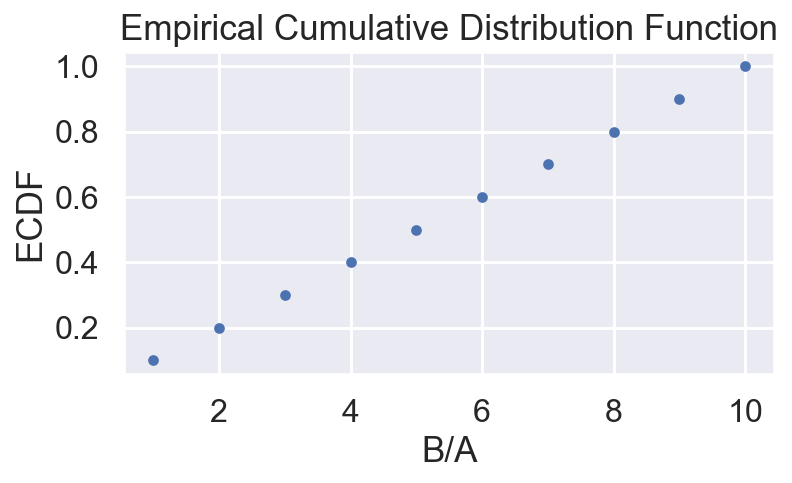

In [69]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
%matplotlib inline

n_trials = 10
A = [1,2,3,4,5,6,7,8,9,10]

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    print(x)
    n = x.size
    y = np.arange(1, n+1) / n
    print(y)
    return(x,y)

x, y = ecdf(A)

# plot ECDF
plt.figure(figsize=(6,3), dpi=140)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('B/A')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function')
plt.show()


# sns.distplot(ratios, kde=False, bins=20)

# 16 - Into to Bayes Factor and Posterior Odds